Tanzania Water Pumps

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import scipy.stats as stats
import seaborn as sns
import numpy as np


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, precision_score 
from sklearn.metrics import recall_score, accuracy_score, f1_score, log_loss
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, plot_roc_curve

from sklearn.metrics import classification_report, auc

%matplotlib inline



import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


from sklearn.metrics import confusion_matrix, plot_confusion_matrix, precision_score, multilabel_confusion_matrix 
from sklearn.metrics import recall_score, accuracy_score, f1_score, log_loss
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, plot_roc_curve
from sklearn.metrics import classification_report, auc

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, FunctionTransformer, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import MissingIndicator, SimpleImputer


from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline




In [66]:
df1 = pd.read_csv('Data/water_columns.csv')
df1.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [67]:
df2 = pd.read_csv('Data/water_status_group.csv')
df2.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [68]:
water_pump = df1.merge(df2, how='right')
water_pump.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [69]:
water_pump.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [6]:
water_pump['status_group'].value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

In [7]:
water_pump.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [8]:
water_pump.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [9]:
print(water_pump['amount_tsh'].nunique())
print()
print ()
print(water_pump['amount_tsh'].value_counts())


98


0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
8500.0          1
6300.0          1
220.0           1
138000.0        1
12.0            1
Name: amount_tsh, Length: 98, dtype: int64


In [10]:
print(water_pump['date_recorded'].nunique())
print()
print()
print(water_pump['date_recorded'].value_counts())
#use to calculate new column age

356


2011-03-15    572
2011-03-17    558
2013-02-03    546
2011-03-14    520
2011-03-16    513
             ... 
2004-04-01      1
2011-09-01      1
2011-09-05      1
2011-09-06      1
2011-09-12      1
Name: date_recorded, Length: 356, dtype: int64


In [11]:
print(water_pump['funder'].nunique())
print()
print()
print(water_pump['funder'].value_counts())
#drop column

1897


Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Italian                      1
Siza Mayengo                 1
Tlc/seleman Mang'ombe        1
Kayempu Ltd                  1
Tdrs                         1
Name: funder, Length: 1897, dtype: int64


In [12]:
print(water_pump['gps_height'].nunique())
print()
print()
print(water_pump['gps_height'].value_counts())
#lots of unknown/zero values - we think zero is important

2428


 0       20438
-15         60
-16         55
-13         55
-20         52
         ...  
 2285        1
 2424        1
 2552        1
 2413        1
 2385        1
Name: gps_height, Length: 2428, dtype: int64


In [13]:
print(water_pump['installer'].nunique())
print()
print()
print(water_pump['installer'].value_counts())
#use'unknown'
#drop
#create org_less_50_install

2145


DWE                  17402
Government            1825
RWE                   1206
Commu                 1060
DANIDA                1050
                     ...  
COYI                     1
Governmen                1
DADIS                    1
Igolola community        1
MWAKI CONTRACTO          1
Name: installer, Length: 2145, dtype: int64


In [14]:
print(water_pump['longitude'].nunique())
print()
print()
print(water_pump['longitude'].value_counts())
#use to map location

57516


0.000000     1812
37.540901       2
33.010510       2
39.093484       2
32.972719       2
             ... 
37.579803       1
33.196490       1
34.017119       1
33.788326       1
30.163579       1
Name: longitude, Length: 57516, dtype: int64


In [15]:
print(water_pump['latitude'].nunique())
print()
print()
print(water_pump['latitude'].value_counts())
#use to map location

57517


-2.000000e-08    1812
-6.985842e+00       2
-3.797579e+00       2
-6.981884e+00       2
-7.104625e+00       2
                 ... 
-5.726001e+00       1
-9.646831e+00       1
-8.124530e+00       1
-2.535985e+00       1
-2.598965e+00       1
Name: latitude, Length: 57517, dtype: int64


In [16]:
print(water_pump['basin'].nunique())
print()
print()
print(water_pump['basin'].value_counts())

9


Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64


In [17]:
print(water_pump['subvillage'].nunique())
print()
print()
print(water_pump['subvillage'].value_counts())
#has almost 20,000 responses - some numbers and some words
#drop column

19287


Madukani              508
Shuleni               506
Majengo               502
Kati                  373
Mtakuja               262
                     ... 
Murgwanza Hospital      1
Kibundai                1
Kakungiri               1
Komalyangula            1
Kafunjo                 1
Name: subvillage, Length: 19287, dtype: int64


In [18]:
print(water_pump['region'].nunique())
print()
print()
print(water_pump['region'].value_counts())

21


Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64


In [19]:
print(water_pump['region_code'].nunique())
print()
print()
print(water_pump['region_code'].value_counts())

water_pump['region_code'] = water_pump['region_code'].astype('str')

27


11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: region_code, dtype: int64


In [20]:
print(water_pump['district_code'].nunique())
print()
print()
print(water_pump['district_code'].value_counts())
#drop

20


1     12203
2     11173
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64


In [21]:
print(water_pump['lga'].nunique())
print()
print()
print(water_pump['lga'].value_counts())
#drop Nyamagana
water_pump.drop(water_pump[water_pump['lga'] == 'Nyamagana'].index, inplace = True)
#group together Moshi Urban, Kigoma Urban, Arusha Urban, Lindi Urban as other urban

125


Njombe          2503
Arusha Rural    1252
Moshi Rural     1251
Bariadi         1177
Rungwe          1106
                ... 
Moshi Urban       79
Kigoma Urban      71
Arusha Urban      63
Lindi Urban       21
Nyamagana          1
Name: lga, Length: 125, dtype: int64


In [22]:
print(water_pump['ward'].nunique())
print()
print()
print(water_pump['ward'].value_counts())
#drop

2091


Igosi               307
Imalinyi            252
Siha Kati           232
Mdandu              231
Nduruma             217
                   ... 
Mwanga Kaskazini      1
Linda                 1
Mawenzi               1
Ifinga                1
Ikweha                1
Name: ward, Length: 2091, dtype: int64


In [23]:
print(water_pump['population'].nunique())
print()
print()
print(water_pump['population'].value_counts())

water_pump['population'].replace(to_replace=0, value=np.nan, inplace=True)

1049


0       21380
1        7025
200      1940
150      1892
250      1681
        ...  
3241        1
1960        1
1685        1
2248        1
1439        1
Name: population, Length: 1049, dtype: int64


In [24]:
print(water_pump['public_meeting'].nunique())
print()
print()
print(water_pump['public_meeting'].value_counts())
#doesnt seem like it would be relevant
water_pump['public_meeting'].replace(to_replace=np.nan, value="Unknown", inplace=True)

2


True     51010
False     5055
Name: public_meeting, dtype: int64


In [25]:
print(water_pump['public_meeting'].value_counts())

True       51010
False       5055
Unknown     3334
Name: public_meeting, dtype: int64


In [26]:
print(water_pump['scheme_management'].nunique())
print()
print()
print(water_pump['scheme_management'].value_counts())
#change none 
water_pump['scheme_management'] = water_pump['scheme_management'].replace("None", "Other")
water_pump['scheme_management'].replace(to_replace=np.nan, value="Unknown", inplace=True)

12


VWC                 36792
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64


In [27]:
print(water_pump['scheme_name'].nunique())
print()
print()
print(water_pump['scheme_name'].value_counts())
#drop col
#28000 missing values

2696


K                              682
None                           644
Borehole                       546
Chalinze wate                  405
M                              400
                              ... 
Mbatakero mradi wa Maji shu      1
Kirwa i water supply             1
Shungubweni Water Supply         1
Dara                             1
Borehole pump pumped scheme      1
Name: scheme_name, Length: 2696, dtype: int64


In [28]:
print(water_pump['permit'].nunique())
print()
print()
print(water_pump['permit'].value_counts())
# has 3056 empty values, 
water_pump['permit'].replace(to_replace=np.nan, value="Unknown", inplace=True)

2


True     38851
False    17492
Name: permit, dtype: int64


In [29]:
water_pump['permit'].groupby(water_pump['status_group']).value_counts(normalize=True)

status_group             permit 
functional               True       0.667752
                         False      0.280387
                         Unknown    0.051861
functional needs repair  True       0.624739
                         False      0.305768
                         Unknown    0.069493
non functional           True       0.640275
                         False      0.312273
                         Unknown    0.047452
Name: permit, dtype: float64

In [30]:
print(water_pump['construction_year'].nunique())
print()
print()
print(water_pump['construction_year'].value_counts())
#lots of unknown/zero values - 20709
#use 'unnknown'
#group together 1960-1969

55


0       20708
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64


In [31]:
print(water_pump['extraction_type'].nunique())
print()
print()
print(water_pump['extraction_type'].value_counts())
#drop - will use extraction type group

18


gravity                      26780
nira/tanira                   8153
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64


In [32]:
print(water_pump['extraction_type_group'].nunique())
print()
print()
print(water_pump['extraction_type_group'].value_counts())

13


gravity            26780
nira/tanira         8153
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64


In [33]:
print(water_pump['extraction_type_class'].nunique())
print()
print()
print(water_pump['extraction_type_class'].value_counts())

7


gravity         26780
handpump        16455
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64


In [34]:
print(water_pump['management'].nunique())
print()
print()
print(water_pump['management'].value_counts())

12


vwc                 40506
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64


In [35]:
print(water_pump['management_group'].nunique())
print()
print()
print(water_pump['management_group'].value_counts())

5


user-group    52489
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64


In [36]:
print(water_pump['payment'].nunique())
print()
print()
print(water_pump['payment'].value_counts())

7


never pay                25347
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64


In [37]:
print(water_pump['payment_type'].nunique())
print()
print()
print(water_pump['payment_type'].value_counts())
#drop - same values as payment feature

7


never pay     25347
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64


In [38]:
print(water_pump['water_quality'].nunique())
print()
print()
print(water_pump['water_quality'].value_counts())
#drop

8


soft                  50817
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64


In [39]:
print(water_pump['quality_group'].nunique())
print()
print()
print(water_pump['quality_group'].value_counts())
#water_quality and quality_group are similar: the quality_group just groups the salty 
#and flouride together, soft is same as good. 

6


good        50817
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64


In [40]:
print(water_pump['quantity'].nunique())
print()
print()
print(water_pump['quantity'].value_counts())

5


enough          33185
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64


In [41]:
print(water_pump['quantity_group'].nunique())
print()
print()
print(water_pump['quantity_group'].value_counts())
#drop same as quantity feature

5


enough          33185
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64


In [42]:
print(water_pump['source'].nunique())
print()
print()
print(water_pump['source'].value_counts())

10


spring                  17021
shallow well            16823
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64


In [43]:
print(water_pump['source_type'].nunique())
print()
print()
print(water_pump['source_type'].value_counts())
#drop, same as source feature just grouped differently

7


spring                  17021
shallow well            16823
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64


In [44]:
print(water_pump['source_class'].nunique())
print()
print()
print(water_pump['source_class'].value_counts())

3


groundwater    45793
surface        13328
unknown          278
Name: source_class, dtype: int64


In [45]:
water_pump['source_class'].groupby(water_pump['status_group']).value_counts(normalize=True)

status_group             source_class
functional               groundwater     0.769863
                         surface         0.225239
                         unknown         0.004898
functional needs repair  groundwater     0.634932
                         surface         0.363910
                         unknown         0.001158
non functional           groundwater     0.798186
                         surface         0.196775
                         unknown         0.005039
Name: source_class, dtype: float64

In [46]:
print(water_pump['waterpoint_type'].nunique())
print()
print()
print(water_pump['waterpoint_type'].value_counts())

7


communal standpipe             28522
hand pump                      17487
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64


In [47]:
print(water_pump['waterpoint_type_group'].nunique())
print()
print()
print(water_pump['waterpoint_type_group'].value_counts())
#drop - waterpoint type does a better job of grouping communal standpipes
# and multiple communal standpipes

6


communal standpipe    34625
hand pump             17487
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64


In [48]:
water_pump['construction_year'].replace(to_replace=0, value=np.nan, inplace=True)
water_pump["unknown_construction_yr"] = water_pump["construction_year"].isnull()

In [49]:
water_pump['construction_year'].isnull().sum()

20708

In [50]:

water_pump['age_at_inspection'] = water_pump['date_recorded'].str[:4].astype(int) - water_pump['construction_year'] 
water_pump

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,unknown_construction_yr,age_at_inspection
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,False,12.0
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,False,3.0
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,False,4.0
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,False,27.0
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,False,14.0
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional,False,15.0
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional,True,NaN
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional,True,NaN


In [51]:
water_pump['water_per_person'] = water_pump['amount_tsh']/water_pump['population']

In [52]:
drop_cols = ["funder", "id","subvillage", "district_code", "ward", "scheme_name", "installer",
             "longitude", "latitude", "wpt_name","date_recorded", "num_private", "population",
             "extraction_type", "payment_type", "water_quality", "recorded_by",
             "quantity_group", "source_type", "waterpoint_type_group", "construction_year"]

In [53]:
water_pump.drop(drop_cols, axis=1, inplace=True)
water_pump.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59399 entries, 0 to 59399
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   amount_tsh               59399 non-null  float64
 1   gps_height               59399 non-null  int64  
 2   basin                    59399 non-null  object 
 3   region                   59399 non-null  object 
 4   region_code              59399 non-null  object 
 5   lga                      59399 non-null  object 
 6   public_meeting           59399 non-null  object 
 7   scheme_management        59399 non-null  object 
 8   permit                   59399 non-null  object 
 9   extraction_type_group    59399 non-null  object 
 10  extraction_type_class    59399 non-null  object 
 11  management               59399 non-null  object 
 12  management_group         59399 non-null  object 
 13  payment                  59399 non-null  object 
 14  quality_group         

In [54]:
water_pump.isnull().sum()

amount_tsh                     0
gps_height                     0
basin                          0
region                         0
region_code                    0
lga                            0
public_meeting                 0
scheme_management              0
permit                         0
extraction_type_group          0
extraction_type_class          0
management                     0
management_group               0
payment                        0
quality_group                  0
quantity                       0
source                         0
source_class                   0
waterpoint_type                0
status_group                   0
unknown_construction_yr        0
age_at_inspection          20708
water_per_person           21380
dtype: int64

In [55]:
le = LabelEncoder()
water_pump["status_group"] = le.fit_transform(water_pump["status_group"])
water_pump.head()


,amount_tsh,gps_height,basin,region,region_code,lga,public_meeting,scheme_management,permit,extraction_type_group,...,payment,quality_group,quantity,source,source_class,waterpoint_type,status_group,unknown_construction_yr,age_at_inspection,water_per_person
0,6000.0,1390,Lake Nyasa,Iringa,11,Ludewa,True,VWC,False,gravity,...,pay annually,good,enough,spring,groundwater,communal standpipe,0,False,12.0,55.045872
1,0.0,1399,Lake Victoria,Mara,20,Serengeti,Unknown,Other,True,gravity,...,never pay,good,insufficient,rainwater harvesting,surface,communal standpipe,0,False,3.0,0.000000
2,25.0,686,Pangani,Manyara,21,Simanjiro,True,VWC,True,gravity,...,pay per bucket,good,enough,dam,surface,communal standpipe multiple,0,False,4.0,0.100000
3,0.0,263,Ruvuma / Southern Coast,Mtwara,90,Nanyumbu,True,VWC,True,submersible,...,never pay,good,dry,machine dbh,groundwater,communal standpipe multiple,2,False,27.0,0.000000
4,0.0,0,Lake Victoria,Kagera,18,Karagwe,True,Unknown,True,gravity,...,never pay,good,seasonal,rainwater harvesting,surface,communal standpipe,0,True,NaN,NaN


In [56]:
water_pump.to_csv('./Data/cleaned_water_pump.csv', index=False)

In [60]:
water_pump["gps_height"].groupby(by=water_pump["status_group"]).mean()

status_group
0    740.131188
1    627.607135
2    574.489944
Name: gps_height, dtype: float64

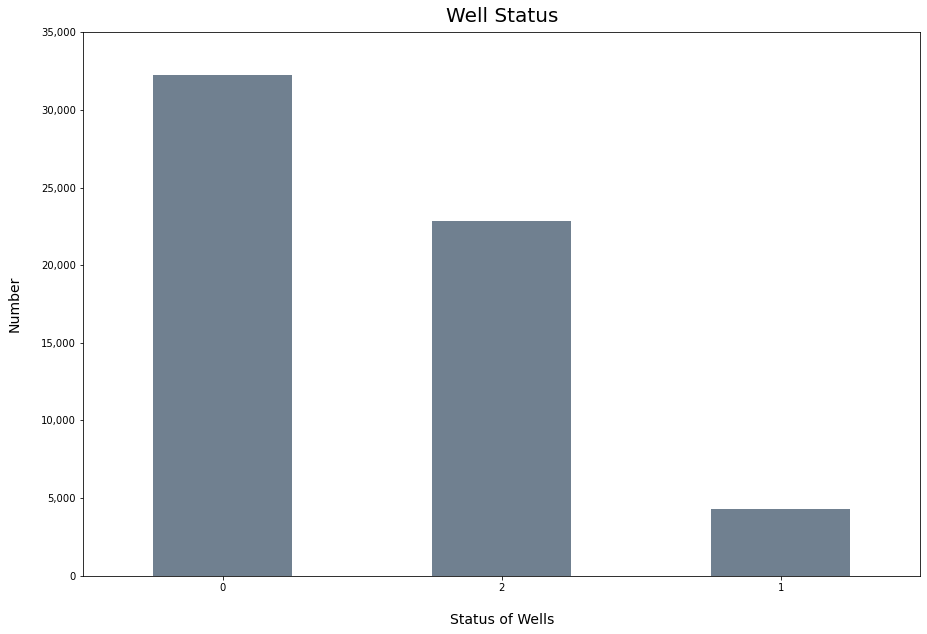

In [64]:
fig, ax = plt.subplots(figsize = (15, 10))


ax = water_pump['status_group'].value_counts().plot(kind='bar', color='slategrey');
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

ax.set_title('Well Status', fontsize='20', pad=10)
ax.set_xlabel('Status of Wells', fontsize='14', labelpad=20)
ax.set_ylabel('Number', fontsize='14', labelpad=20)
ax.set_ylim([0, 35000])

plt.xticks(rotation=0);


#plt.savefig('./images/Well_Status_bar_Chart', bbox_inches="tight", dpi=500);

In [ ]:
#Create bar chart showing the average rating by genre
fig, ax = plt.subplots(figsize=(15,12))

plt.rcParams.update({'font.size': 20});

ax.bar(x = list(avg_full.keys()), height = list(avg_full.values()), color = '#0059B3');
ax.tick_params(axis='x', rotation=90);
ax.set_title('Average Rating by Movie Genre');
ax.set_ylabel('Average Rating');
ax.set_xlabel('Movie Genre');

plt.savefig('./images/Average_rating_genre', dpi=500)

In [57]:
X= water_pump.drop('status_group', axis=1)
y=water_pump['status_group']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [58]:
sns.pairplot(water_pump[numeric_cols]);

NameError: name 'numeric_cols' is not defined

In [ ]:
dummy = DummyClassifier(strategy= "most_frequent", random_state=42)
dummy_model = dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

In [ ]:
y_pred = dummy_model.predict(X_test)
y_pred

In [ ]:
print(classification_report(y_test, y_pred));

In [ ]:
dt_model_pipe = Pipeline(steps=[('ct', CT), ('dt', DecisionTreeClassifier(random_state=42, min_impurity_decrease= 0.3))])

In [ ]:
dt_model_pipe.fit(X_train, y_train)

In [ ]:
dt_model_pipe.score(X_train, y_train)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [ ]:
water_pump['pop_year'] = water_pump['population'] / water_pump['age']

In [ ]:
water_pump['pop_year-construction'] = water_pump['population'] / water_pump['age_construction']

In [ ]:
for col_name in water_pump.columns:
    print(water_pump[col_name].value_counts())

In [ ]:
water_pump['pop/year'] = water_pump['population'] / water_pump['age']

In [ ]:
water_pump.corr().status_group.sort_values(ascending=False)


In [ ]:
water_pump['num_private'].value_counts()

In [ ]:
water_pump['age_construction'] = water_pump['current_yr'] - water_pump['construction_year']
water_pump['age_construction'].loc[water_pump['age_construction'] == water_pump['current_yr']] = 0

In [ ]:
scatterplot_data = X_train_numeric.drop("sqft_living", axis=1) #already graphed above

fig, axes = plt.subplots(ncols=3, nrows=5, figsize=(12, 8))
fig.set_tight_layout(True)

for index, col in enumerate(scatterplot_data.columns):
    ax = axes[index//3][index%3]
    ax.scatter(X_train_numeric[col], y_train, alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("price")

    
fig.delaxes(axes[4][1])
fig.delaxes(axes[4][2])

In [ ]:
water_pump['funder'].value_counts()

In [ ]:
water_pump['funder'].nunique()

In [ ]:
water_pump['funder'].value_counts().plot(kind='hist');

In [56]:
X = water_pump.drop('status_group', axis=1)
y = water_pump['status_group']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [61]:
sm = SMOTE(sampling_strategy='auto',random_state=42)
counter = Counter(y_train)
print(counter)

TypeError: 'Series' object is not callable

In [60]:
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

TypeError: 'Series' object is not callable

In [62]:
...
# transform the dataset
strategy = {0:24128, 1:17150., 2:6542}
oversample = SMOTE(sampling_strategy=strategy)
X, y = oversample.fit_resample(X, y)

ValueError: could not convert string to float: 'Lake Nyasa'